<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Parking_Violations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset

The dataset chosen for the purpose of this report is 'Parking Violations in New York City'. Although the original dataset has data from 2016 onwards, for the purpose of this report only data after 2022 has been chosen.

# Starter Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
import warnings
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from matplotlib.ticker import FuncFormatter

In [ ]:
park_vio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parking Violations.csv')

<ipython-input-2-c4d44324de07>:1: DtypeWarning: Columns (17,18,20,22,23,29,30,31,32,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  park_vio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parking Violations.csv')


# Data Exploration

## Shape

In [ ]:
# Looking at the number of rows and columns in the dataset
park_vio.shape

(4507492, 43)

We notice that there are approximately 4.5 million rows and 43 columns in this dataset, so we are going to look at the missing values and determine which columns to drop.

## Missing Values

In [ ]:
park_vio.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [ ]:
# Looking at missing values
park_vio.isnull().sum()

,0
Summons Number,0
Plate ID,82
Registration State,0
Plate Type,0
Issue Date,0
Violation Code,0
Vehicle Body Type,13606
Vehicle Make,6081
Issuing Agency,0
Street Code1,0


After looking at the missing values and relevance of columns, I have decided to drop 'Violation Location', 'Issuer Command', 'Double Parking Violation', 'Hydrant Violation','No Standing or Stopping Violation', 'Violation Post Code', 'Meter Number',
    'Unregistered Vehicle?', 'To Hours In Effect', 'From Hours In Effect', 'Days Parking In Effect    ',
    'Violation Legal Code', 'Intersecting Street', 'House Number',
    'Violation In Front Of Or Opposite', 'Time First Observed', 'Issuer Squad', 'Vehicle Color',
    'Street Code1', 'Street Code2', 'Street Code3', 'Summons Number', 'Plate ID',
    'Vehicle Body Type', 'Sub Division', 'Violation Precinct',
    'Issuer Precinct', 'Issuer Code', 'Plate Type'.

These columns were dropped because they either had repeating information or  too many missing values to work with.

In [ ]:
# Dropping all columns with too many missing values and irrelevant
columns_to_drop = [
    'Violation Location', 'Issuer Command', 'Double Parking Violation', 'Hydrant Violation',
    'No Standing or Stopping Violation', 'Violation Post Code', 'Meter Number',
    'Unregistered Vehicle?', 'To Hours In Effect', 'From Hours In Effect', 'Days Parking In Effect    ',
    'Violation Legal Code', 'Intersecting Street', 'House Number',
    'Violation In Front Of Or Opposite', 'Time First Observed', 'Issuer Squad', 'Vehicle Color',
    'Street Code1', 'Street Code2', 'Street Code3', 'Summons Number', 'Plate ID',
    'Vehicle Body Type', 'Sub Division', 'Violation Precinct',
    'Issuer Precinct', 'Issuer Code', 'Plate Type'
]

park_vio = park_vio.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
# Checking the new number of columns
park_vio.shape

(4507492, 14)

After looking at the shape, we are now left 14 columns which is a more manageable number.

In [ ]:
# Deleting all missing values since they are only a small part of the dataset
park_vio = park_vio.dropna()

# Making sure there are no more missing values
park_vio.isnull().sum()

,0
Registration State,0
Issue Date,0
Violation Code,0
Vehicle Make,0
Issuing Agency,0
Vehicle Expiration Date,0
Violation Time,0
Violation County,0
Street Name,0
Date First Observed,0


In [ ]:
# Checking shape after deleting all missing values
park_vio.shape

(4356218, 14)

I am dropping the missing values instead of imputing them, as they are only a very small part of the dataset.

## Data Types

In [ ]:
park_vio.head(5)

,Registration State,Issue Date,Violation Code,Vehicle Make,Issuing Agency,Vehicle Expiration Date,Violation Time,Violation County,Street Name,Date First Observed,Law Section,Vehicle Year,Feet From Curb,Violation Description
3466,NY,05/31/2023,7,TOYOT,V,0,1259P,BK,MCDONALD AVE (N/B) @,0,1111,2006,0,FAILURE TO STOP AT RED LIGHT
3502,NY,06/01/2023,99,JEEP,S,20220408,0700A,Qns,41 STREET,0,408,2018,0,Vehicle Storage
3828,NY,06/02/2023,7,TOYOT,V,0,0101P,QN,QUEENS BLVD (E/B) @,0,1111,2022,0,FAILURE TO STOP AT RED LIGHT
6681,NY,06/08/2023,5,CADIL,V,0,0610P,MN,EB E 14TH STREET @ B,0,1111,2021,0,BUS LANE VIOLATION
6682,NY,06/08/2023,7,PREVO,V,0,0700P,MN,WEST ST (N/B) @ W HO,0,1111,2015,0,FAILURE TO STOP AT RED LIGHT


In [ ]:
# Checking the data types of the columns
park_vio.dtypes

,0
Registration State,object
Issue Date,object
Violation Code,int64
Vehicle Make,object
Issuing Agency,object
Vehicle Expiration Date,int64
Violation Time,object
Violation County,object
Street Name,object
Date First Observed,int64


After looking at the data types, I decided that a lot of data types have to be changed.

I converted Issue Date, Vehicle Expiration Date, Vehicle Year, and Date First Observed to datetime.

Vehicle Make, Violation County, Issuing Agency, Law Section, and Registration State were converted to categories.

And lastly, Violation Time, Street Name, Violation Description, and Violation Code have been converted to strings.

In [ ]:
# Convert date columns to datetime
date_columns = [
        'Issue Date', 'Vehicle Expiration Date',
        'Vehicle Year', 'Date First Observed'
]
park_vio[date_columns] = park_vio[date_columns].apply(pd.to_datetime)

# Convert categorical columns
categorical_columns = [
    'Vehicle Make', 'Violation County',
    'Issuing Agency', 'Law Section', 'Registration State'
]
park_vio[categorical_columns] = park_vio[categorical_columns].astype('category')

# Convert str columns
str_columns = [
    'Violation Time', 'Street Name',
    'Violation Description', 'Violation Code'
]
park_vio[str_columns] = park_vio[str_columns].astype(str)

# Check the updated data types
print(park_vio.dtypes)

Registration State               category
Issue Date                 datetime64[ns]
Violation Code                     object
Vehicle Make                     category
Issuing Agency                   category
Vehicle Expiration Date    datetime64[ns]
Violation Time                     object
Violation County                 category
Street Name                        object
Date First Observed        datetime64[ns]
Law Section                      category
Vehicle Year               datetime64[ns]
Feet From Curb                      int64
Violation Description              object
dtype: object


# Histograms

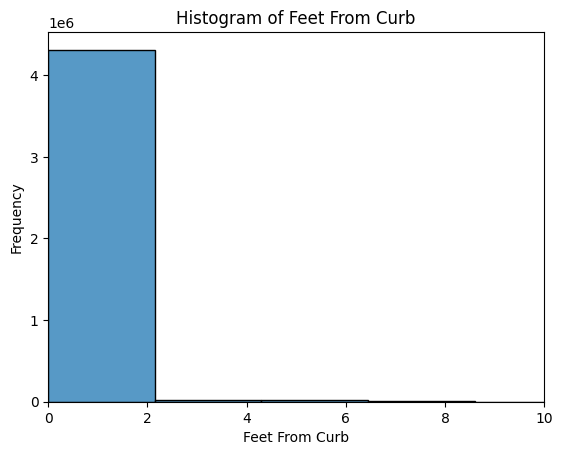

In [ ]:
# Plot histogram of 'Feet From Curb'
sns.histplot(data=park_vio, x='Feet From Curb', bins=20)
plt.title('Histogram of Feet From Curb')
plt.xlabel('Feet From Curb')
plt.ylabel('Frequency')

# Set x-axis limits between 0 and 10
plt.xlim(0, 10)

# Display the plot
plt.show()

As 'Feet From Curb' is the only numeric column in the dataset, I built a histogram for only this column.

The distribution is noticed to be an exponential decay, however, it is noticed that majority of the parking violations are noticed to be 0-2 feet from the curb.

# Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


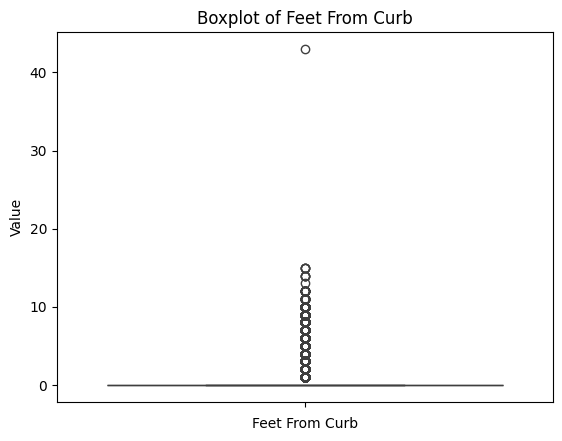

In [ ]:
sns.boxplot(park_vio['Feet From Curb'])
plt.title("Boxplot of Feet From Curb")
plt.ylabel("Value")
plt.xlabel("Feet From Curb")
plt.show()

The boxplot displays a lot of outliers, however they will not be removed in order to ensure that the variance remains.

# Count Plot of Categorical Columns

After reading the description of the dataset, I noticed that the Issuing Agency each had an actual department associated to it.

Hence for clearer understanding of the dataset when looking at visualizations, the codes will be replaced by corresponding department names.

In [ ]:
# Define the mapping of Issuing Agency codes to names
agency_mapping = {
    'S': 'DEPARTMENT OF SANITATION',
    'T': 'TRAFFIC',
    'V': 'DEPARTMENT OF TRANSPORTATION'
}

# Replace the Issuing Agency codes with the corresponding names
park_vio['Issuing Agency'] = park_vio['Issuing Agency'].replace(agency_mapping)

# Display the updated DataFrame
park_vio[['Issuing Agency']].head(5)

<ipython-input-15-717809ce6a45>:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  park_vio['Issuing Agency'] = park_vio['Issuing Agency'].replace(agency_mapping)


,Issuing Agency
3466,DEPARTMENT OF TRANSPORTATION
3502,DEPARTMENT OF SANITATION
3828,DEPARTMENT OF TRANSPORTATION
6681,DEPARTMENT OF TRANSPORTATION
6682,DEPARTMENT OF TRANSPORTATION


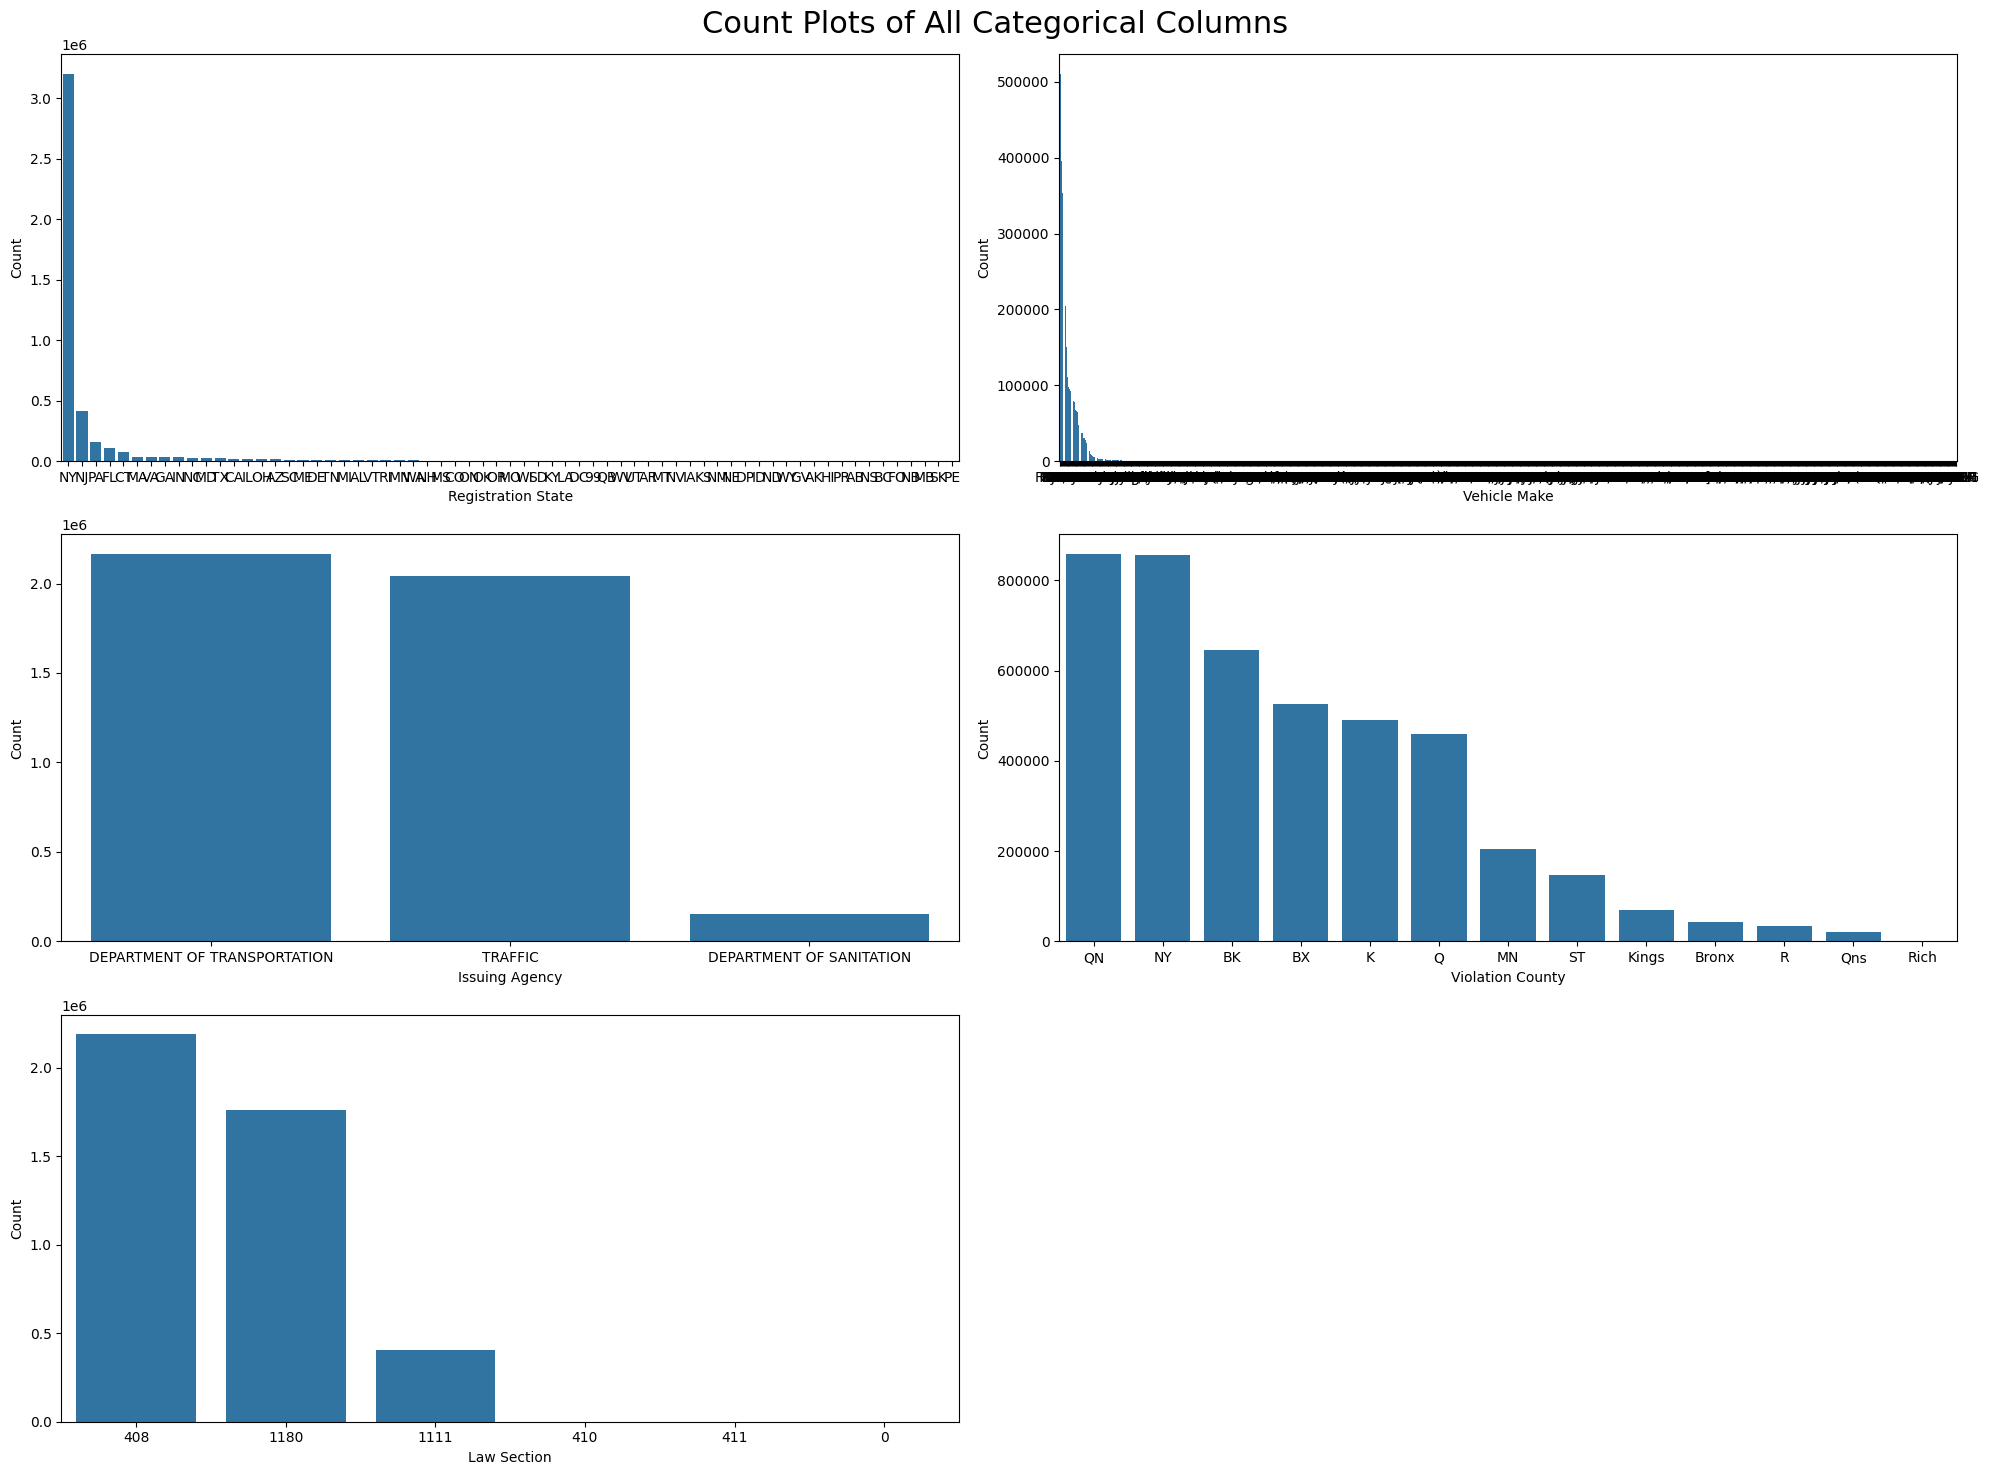

In [ ]:
# Filter categorical columns
categorical_columns = park_vio.select_dtypes(include=['category']).columns

# Set the number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, num_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=park_vio[col], order=park_vio[col].value_counts().index, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlapping
fig.suptitle('Count Plots of All Categorical Columns', fontsize=22)
plt.tight_layout()
plt.show()

Through the count plots, we can notice that Vehicle Make and Registration State have too many unique values which make it super hard to properly interpret the charts.

However, from Law Section, it is evident that the most common section was 408; and Department of Transportation seems to have issued the most amount of tickets.

## Count of All Unique Values of Categorical Columns

To better understand the count plot, we will have a value count of all the categorical columns.

In [ ]:
# Filter categorical columns
categorical_columns = park_vio.select_dtypes(include=['category']).columns

# Create a dictionary to hold the counts
counts_summary = {}

# Iterate through categorical columns and get value counts
for col in categorical_columns:
    value_counts = park_vio[col].value_counts()
    counts_summary[col] = value_counts

# Print the counts for each categorical column
for col, counts in counts_summary.items():
    print(f"\nCounts for {col}:\n")
    print(counts.to_string())


Counts for Registration State:

Registration State
NY    3204327
NJ     416316
PA     157088
FL     107810
CT      78206
MA      37660
VA      37336
GA      34884
IN      30310
NC      28339
MD      28146
TX      21981
CA      15479
IL      15144
OH      14525
AZ      13720
SC      11855
ME       9079
DE       7863
TN       7862
MI       6450
AL       6361
VT       5848
RI       5715
MN       5363
WA       5063
NH       4277
MS       4110
CO       2845
ON       2654
OK       2634
OR       2381
MO       2297
WI       2104
SD       1848
KY       1804
LA       1659
DC       1508
99       1500
QB       1480
WV       1465
UT       1169
AR       1092
MT       1092
NV       1025
IA        812
KS        610
NM        597
NE        502
DP        423
ID        335
ND        220
WY        204
GV        197
AK        185
HI        130
PR         97
AB         96
NS         59
BC         19
FO         15
NB         14
MB         12
SK         12
PE          5

Counts for Vehicle Make:

Vehicle Mak

Through the above count description, I noticed that in Vehicle Make, the same vehicle was counted as different values due to case insensitivity. This issue will now be handled by combining them into one.

In [ ]:
# Convert all values in 'Vehicle Make' to uppercase to handle case insensitivity
park_vio['Vehicle Make'] = park_vio['Vehicle Make'].str.upper()

# Verify if the conversion was successful
print(park_vio['Vehicle Make'].value_counts().head())

park_vio['Vehicle Make'] = park_vio['Vehicle Make'].astype('category')

Vehicle Make
TOYOT    512267
HONDA    512040
FORD     398486
NISSA    355347
CHEVR    237860
Name: count, dtype: int64


# Picking Only Top 10 Values from Categorical Columns

I will be picking only the top 10 values from the categorical columns, although I realize that this will decrease the number of rows by almost 50%; it will allow for the categorical columns to be converted to dummies so that feature selection can be performed on the dataset.

In [ ]:
# Filter categorical columns
categorical_columns = park_vio.select_dtypes(include=['category']).columns

# Create a dictionary to hold the top 10 counts
top_counts_summary = {}

# Iterate through categorical columns and get top 10 value counts
for col in categorical_columns:
    top_value_counts = park_vio[col].value_counts().nlargest(10)  # Get top 10
    top_counts_summary[col] = top_value_counts

# Print the top 10 counts for each categorical column
for col, counts in top_counts_summary.items():
    print(f"\nTop 10 Counts for {col}:\n")
    print(counts.to_string())


Top 10 Counts for Registration State:

Registration State
NY    3204327
NJ     416316
PA     157088
FL     107810
CT      78206
MA      37660
VA      37336
GA      34884
IN      30310
NC      28339

Top 10 Counts for Vehicle Make:

Vehicle Make
TOYOT    512267
HONDA    512040
FORD     398486
NISSA    355347
CHEVR    237860
ME/BE    225223
BMW      215722
JEEP     204600
HYUND    150547
LEXUS    111417

Top 10 Counts for Issuing Agency:

Issuing Agency
DEPARTMENT OF TRANSPORTATION    2165669
TRAFFIC                         2039396
DEPARTMENT OF SANITATION         151153

Top 10 Counts for Violation County:

Violation County
QN       858823
NY       857340
BK       646202
BX       525008
K        490357
Q        460041
MN       204654
ST       146427
Kings     69044
Bronx     41893

Top 10 Counts for Law Section:

Law Section
408     2189952
1180    1760198
1111     405471
410         288
411         249
0            60


In [ ]:
# Trim whitespace and convert to uppercase
park_vio['Registration State'] = park_vio['Registration State'].str.strip().str.upper()

# Filter the DataFrame for the specified states only
states_to_keep = ['NY', 'NJ', 'PA', 'FL', 'CT', 'MA', 'VA', 'GA', 'IN', 'NC']
park_vio = park_vio[park_vio['Registration State'].isin(states_to_keep)]

# Reset index if needed
park_vio.reset_index(drop=True, inplace=True)

# Check the number of unique 'Registration State' values after filtering
print(park_vio['Registration State'].nunique())  # Should return 10
print(park_vio['Registration State'].unique())  # Should list the 10 states
park_vio['Registration State'] = park_vio['Registration State'].astype('category')

10
['NY' 'NJ' 'MA' 'NC' 'PA' 'FL' 'CT' 'VA' 'GA' 'IN']


In [ ]:
# Filter categorical columns
categorical_columns = park_vio.select_dtypes(include=['category']).columns

# Iterate through each categorical column and filter the rows that have the top 10 values
for col in categorical_columns:
    top_10_values = park_vio[col].value_counts().nlargest(10).index  # Get the top 10 values
    park_vio = park_vio[park_vio[col].isin(top_10_values)]  # Keep only rows with top 10 values

In [ ]:
park_vio.shape

(2744891, 14)

Furthermore, I am also splitting the Vehicle Make column into Luxury Cars; wherein ME/BE (Mercedes Benz), BME, LEXUS, and JEEP are categorized into luxury cars which is represented by 1; and TOYOT (Toyota), HONDA, FORD, NISSA (Nissan), CHEVR (Chevrolet), and HYUND (Hyundai) are categorized are non-luxury which is represented by 0.

In [ ]:
# Define the luxury and non-luxury car brands
luxury_brands = ['ME/BE', 'BMW', 'LEXUS', 'JEEP']
non_luxury_brands = ['TOYOT', 'HONDA', 'FORD', 'NISSA', 'CHEVR', 'HYUND']

# Create a new column 'Luxury Cars' in the DataFrame copy
park_vio['Luxury Cars'] = park_vio['Vehicle Make'].apply(lambda x: '0' if x in luxury_brands else '1')

# Display the new DataFrame
print(park_vio[['Vehicle Make', 'Luxury Cars']].head())

   Vehicle Make Luxury Cars
0         TOYOT           1
2         TOYOT           1
8         HONDA           1
11        TOYOT           1
12        TOYOT           1


In [ ]:
park_vio = park_vio.drop(columns=['Vehicle Make'])
park_vio['Luxury Cars'] = park_vio['Luxury Cars'].astype('category')

# Number of Tickets by Borough

I am converting all of the counties into 5 borough so that it is easier to analyze. The five boroughs are Brooklyn, Queens, Manhattan, Bronx, and Staten Island.

In [ ]:
remap_county_dict = {
    'K' : 'Brooklyn',
    'Q' : 'Queens',
    'NY': 'Manhattan',
    'QN': 'Queens',
    'BK': 'Brooklyn',
    'R' : 'Staten Island',
    'BX': 'Bronx',
    'ST': 'Staten Island',
    'MN': 'Manhattan',
    'KINGS': 'Brooklyn',
    'QNS': 'Queens',
    'BRONX': 'Bronx'
}
park_vio['Violation Borough'] = park_vio['Violation County'].map(remap_county_dict).astype('category')
park_vio = park_vio.drop(columns=['Violation County'])
park_vio.head(3)

,Registration State,Issue Date,Violation Code,Issuing Agency,Vehicle Expiration Date,Violation Time,Street Name,Date First Observed,Law Section,Vehicle Year,Feet From Curb,Violation Description,Luxury Cars,Violation Borough
0,NY,2023-05-31,7,DEPARTMENT OF TRANSPORTATION,1970-01-01,1259P,MCDONALD AVE (N/B) @,1970-01-01,1111,1970-01-01 00:00:00.000002006,0,FAILURE TO STOP AT RED LIGHT,1,Brooklyn
2,NY,2023-06-02,7,DEPARTMENT OF TRANSPORTATION,1970-01-01,0101P,QUEENS BLVD (E/B) @,1970-01-01,1111,1970-01-01 00:00:00.000002022,0,FAILURE TO STOP AT RED LIGHT,1,Queens
8,NY,2023-06-10,5,DEPARTMENT OF TRANSPORTATION,1970-01-01,0500P,EB JAMAICA AVE @ SUT,1970-01-01,1111,1970-01-01 00:00:00.000002002,0,BUS LANE VIOLATION,1,Queens


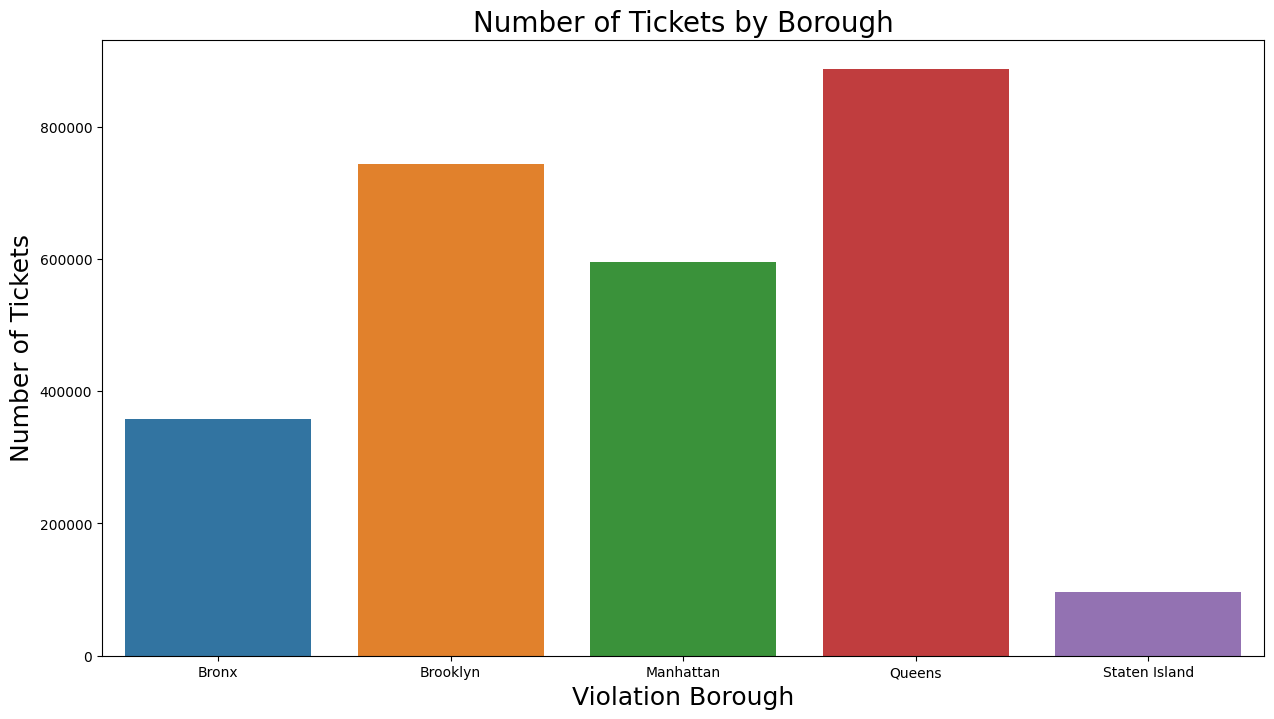

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Violation Borough", data=park_vio, hue="Violation Borough", legend=False)
plt.title('Number of Tickets by Borough', fontsize=20);
plt.xlabel('Violation Borough', fontsize=18)
plt.ylabel('Number of Tickets', fontsize=18)
plt.show()

Through the chart, it is evident that the most number of parking violations occur in Queens.

# Pie Charts

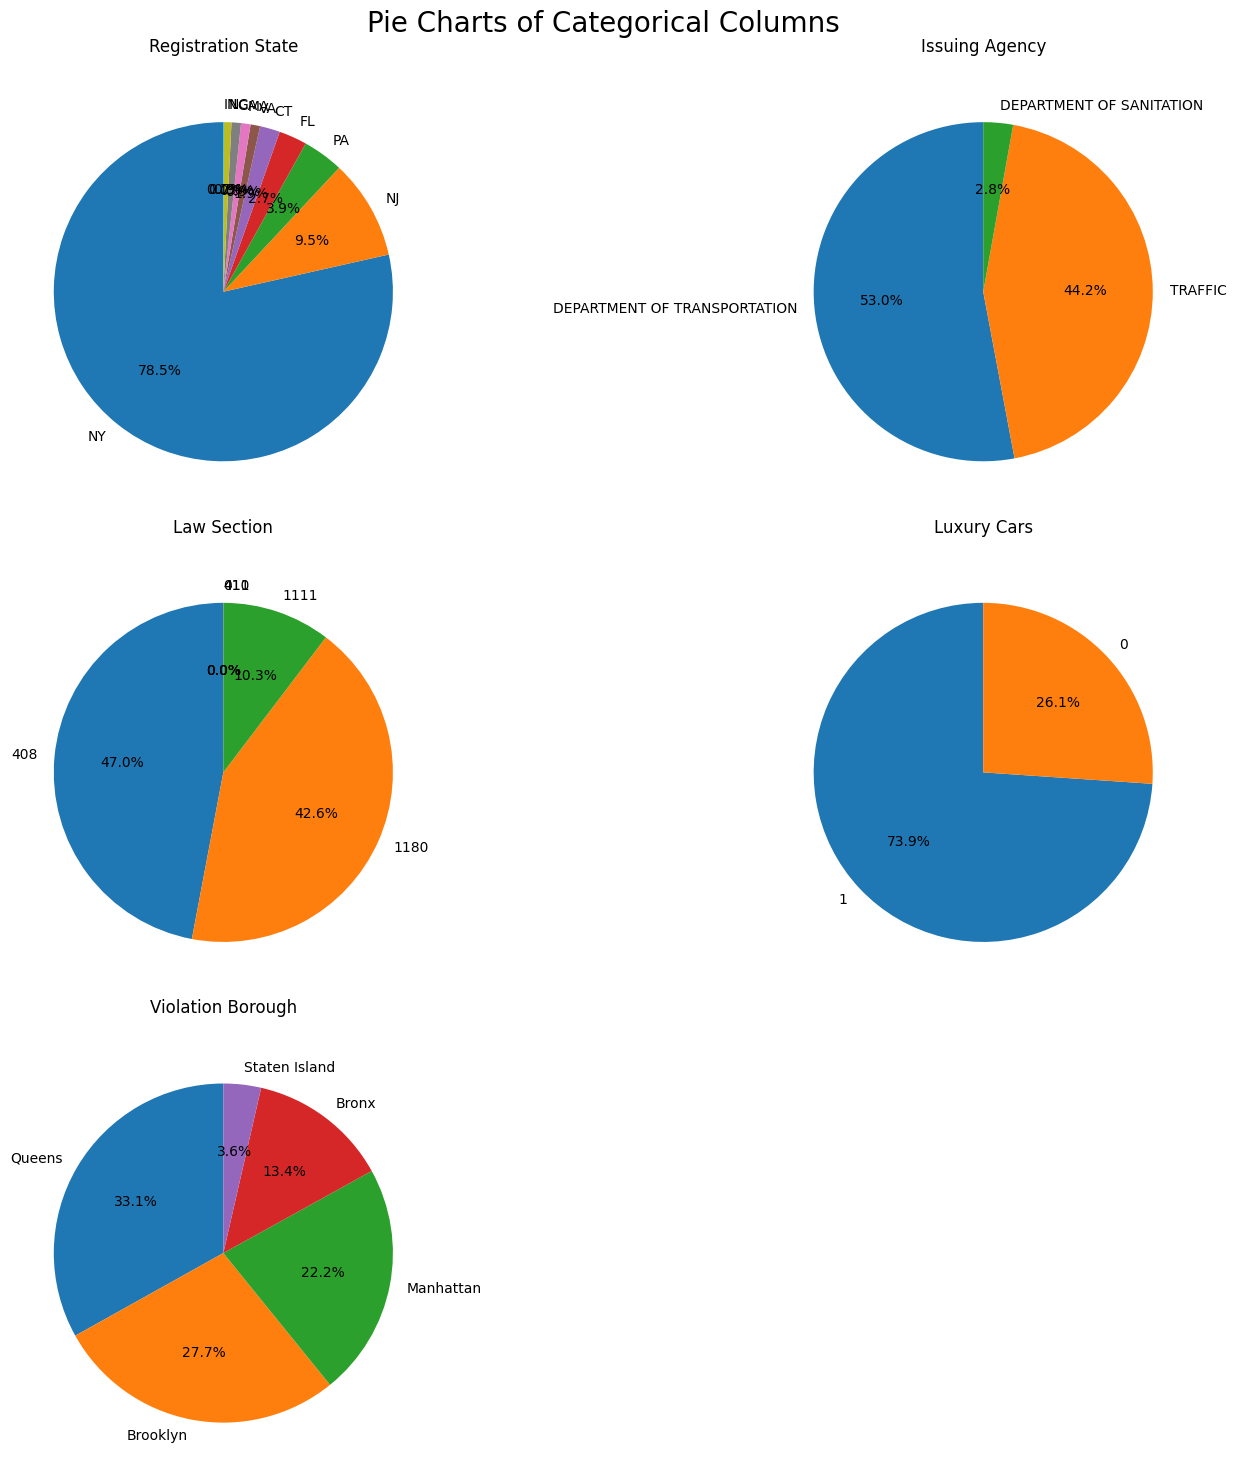

In [ ]:
# Select the needed columns for the pie charts
pie_col = park_vio.select_dtypes(include=['category']).columns

# Set the number of plots per row
plots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(pie_col) + plots_per_row - 1) // plots_per_row

# Create a figure with the appropriate number of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot pie charts for each9 column
for i, col in enumerate(pie_col):
    value_counts = park_vio[col].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col, pad=20)

# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlapping
fig.suptitle("Pie Charts of Categorical Columns", fontsize=20)
plt.tight_layout()
plt.show()

Through the pie chart, we can better understand the distribution within each categorical column.

It is noticed that most of the cars that got a violation were registered in New York. Additionally, the majority tickets were issued by the Department of Transportation.

It is also noticed that there are more luxury cars than non-luxury cars.

# Fines

I will now import another dataset which has the fine amount for each type of violation code. This will help us gain some insights.

In [ ]:
violation_defs_and_fines = pd.read_csv('https://data.cityofnewyork.us/api/views/ncbg-6agr/rows.csv?accessType=DOWNLOAD')
violation_defs_and_fines.head(3)

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,1,FAILURE TO DISPLAY BUS PERMIT,515,515
1,2,NO OPERATOR NAM/ADD/PH DISPLAY,515,515
2,3,UNAUTHORIZED PASSENGER PICK-UP,515,515


In [ ]:
np.sort(park_vio['Violation Code'].unique())

array(['0', '1', '10', '11', '12', '13', '14', '16', '17', '18', '19',
       '20', '21', '22', '25', '26', '27', '29', '3', '30', '31', '33',
       '35', '36', '37', '38', '39', '4', '40', '42', '45', '46', '47',
       '48', '49', '5', '50', '51', '52', '53', '54', '56', '58', '59',
       '60', '61', '62', '63', '64', '66', '67', '68', '69', '7', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80',
       '82', '83', '84', '85', '87', '89', '9', '91', '96', '98', '99'],
      dtype=object)

In [ ]:
park_vio["Violation Code"].isna().sum()

0

After making sure that there were no missing values, I merged both the datasets based on Violation Codes so that each code has its corresponding fine.

In [ ]:
# Renaming the columns so that we can merge the dfs together
violation_defs_and_fines.columns = ['Violation Code', 'Violation Description', 'Fine (below 96th)', 'Fine']
violation_defs_and_fines['Violation Code'] = violation_defs_and_fines['Violation Code'].astype(str)
violation_defs_and_fines.columns

Index(['Violation Code', 'Violation Description', 'Fine (below 96th)', 'Fine'], dtype='object')

In [ ]:
violation_defs_and_fines = violation_defs_and_fines.drop(columns=['Violation Description'], axis=1)
violation_defs_and_fines.columns

Index(['Violation Code', 'Fine (below 96th)', 'Fine'], dtype='object')

In [ ]:
park_vio = pd.merge(park_vio, violation_defs_and_fines, on='Violation Code', how='left')

In [ ]:
# Dropping Fine (below 96th) since we are only going to be using Fine
park_vio = park_vio.drop(columns=['Fine (below 96th)'], axis=1)
park_vio.head(3)

,Registration State,Issue Date,Violation Code,Issuing Agency,Vehicle Expiration Date,Violation Time,Street Name,Date First Observed,Law Section,Vehicle Year,Feet From Curb,Violation Description,Luxury Cars,Violation Borough,Fine
0,NY,2023-05-31,7,DEPARTMENT OF TRANSPORTATION,1970-01-01,1259P,MCDONALD AVE (N/B) @,1970-01-01,1111,1970-01-01 00:00:00.000002006,0,FAILURE TO STOP AT RED LIGHT,1,Brooklyn,50.0
1,NY,2023-06-02,7,DEPARTMENT OF TRANSPORTATION,1970-01-01,0101P,QUEENS BLVD (E/B) @,1970-01-01,1111,1970-01-01 00:00:00.000002022,0,FAILURE TO STOP AT RED LIGHT,1,Queens,50.0
2,NY,2023-06-10,5,DEPARTMENT OF TRANSPORTATION,1970-01-01,0500P,EB JAMAICA AVE @ SUT,1970-01-01,1111,1970-01-01 00:00:00.000002002,0,BUS LANE VIOLATION,1,Queens,250.0


In [ ]:
park_vio.Fine.sum()

191383630.0

The total fine across all boroughs is approximately $191 thousand dollars.

In [ ]:
fine_totals = pd.DataFrame(park_vio.groupby('Violation Borough')['Fine'].sum().sort_values(ascending=False))
fine_totals

<ipython-input-36-99e8ed8ee39e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fine_totals = pd.DataFrame(park_vio.groupby('Violation Borough')['Fine'].sum().sort_values(ascending=False))


,Fine
Violation Borough,
Queens,55177720.0
Manhattan,51965730.0
Brooklyn,50268475.0
Bronx,24677760.0
Staten Island,4860300.0


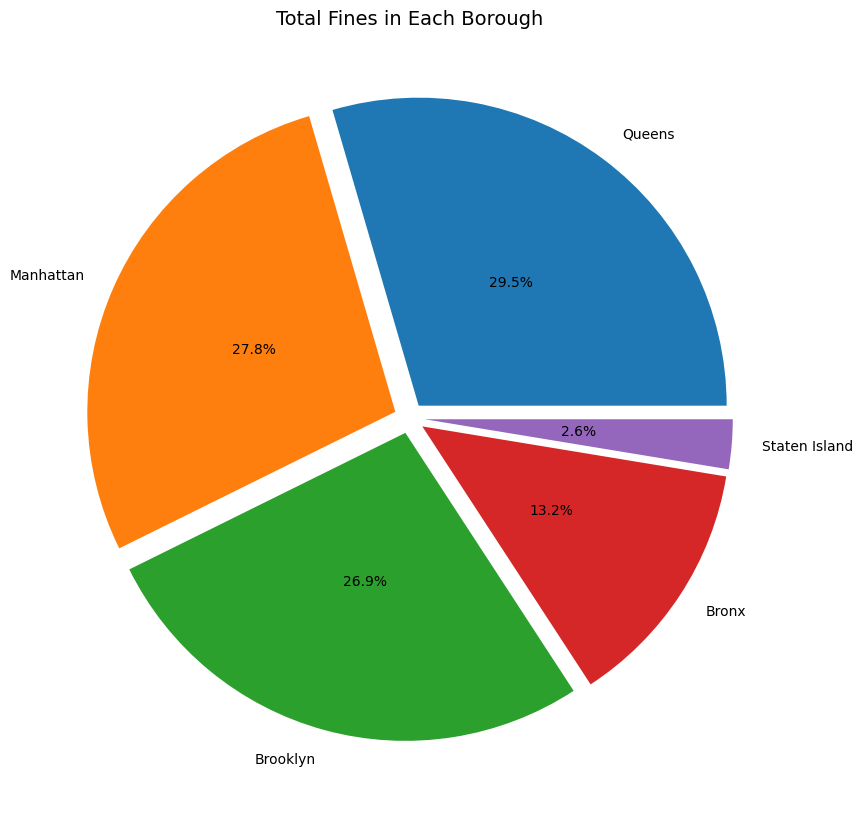

In [ ]:
pie, ax = plt.subplots(figsize=[10,10])
plt.pie(x=np.array(fine_totals.values).ravel(), autopct="%.1f%%", explode=[0.05]*5, labels=fine_totals.index, pctdistance=0.5)
plt.title("Total Fines in Each Borough", fontsize=14);

Through this pie chart, it is evident that Queens has paid the most amount of fines. This is logical as we previously identified that Queens had the highest number of tickets issued.

# Seasonality

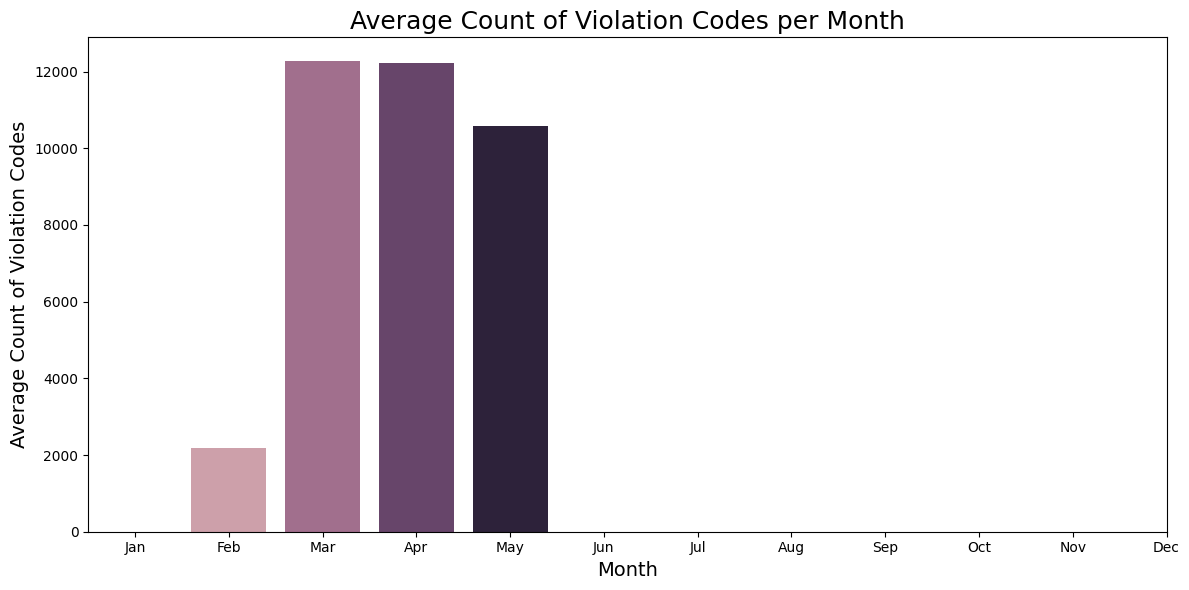

In [ ]:
# Drop rows with invalid dates
park_vio = park_vio.dropna(subset=['Issue Date'])

# Ensure 'Issue Date' is in datetime format
park_vio['Issue Date'] = pd.to_datetime(park_vio['Issue Date'], errors='coerce')

# Extract month from 'Issue Date'
park_vio['Month'] = park_vio['Issue Date'].dt.month

# Group by 'Month' and calculate the average count of 'Violation Code'
violation_by_month = park_vio.groupby('Month')['Violation Code'].value_counts().groupby('Month').mean()

# Reset index for plotting
violation_by_month = violation_by_month.reset_index(name='Average Count')

# Plot the seasonality trend as a barplot
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Average Count', data=violation_by_month, hue='Month', legend=False)

# Customize the plot
plt.title('Average Count of Violation Codes per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Count of Violation Codes', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

Through the seasonality analysis of the number of violations, it is noticed that most of the violation occur in March.

However, this may not be fully accurate since we had deleted a lot of our rows when cleaning the dataset.

# Correlation Matrix

In [ ]:
# Create a copy of the DataFrame
park_vio_copy = park_vio.copy()

# Select categorical columns with fewer unique values (limit high-cardinality columns)
categorical_columns = park_vio_copy.select_dtypes(include=['category']).columns

# Convert the selected categorical columns to dummy variables
park_vio_encoded = pd.get_dummies(park_vio_copy[categorical_columns], drop_first=True)

# Combine encoded categorical columns with numeric columns
numeric_cols = park_vio_copy.select_dtypes(include=['number'])
park_vio_combined = pd.concat([numeric_cols, park_vio_encoded], axis=1)

# Calculate the correlation matrix
corr_matrix = park_vio_combined.corr()

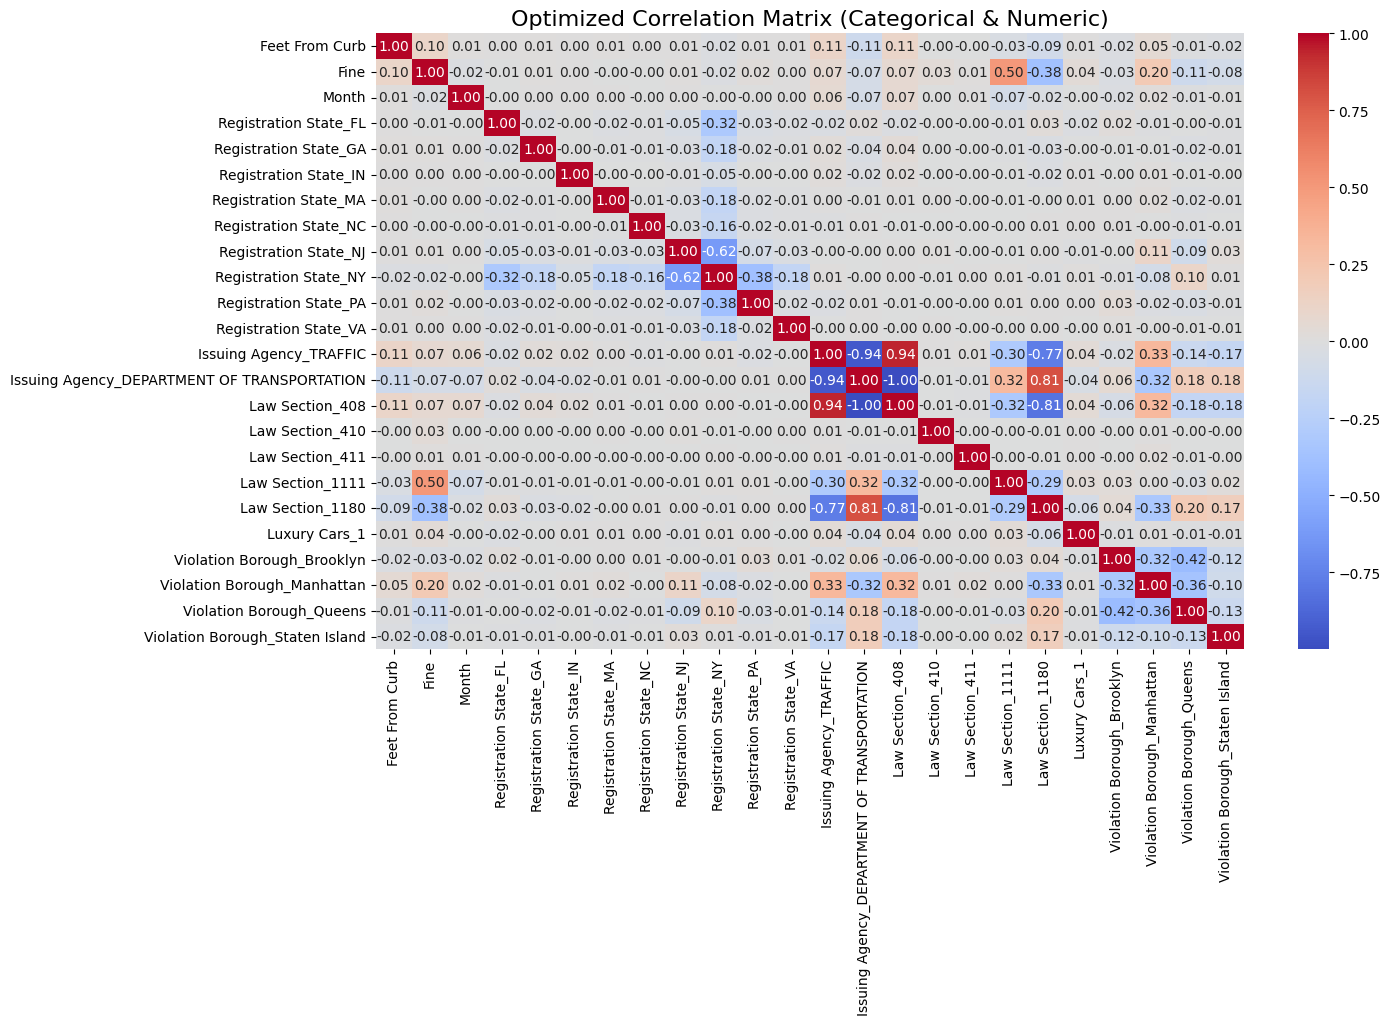

In [ ]:
# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Optimized Correlation Matrix (Categorical & Numeric)', fontsize=16)
plt.show()

Through the correlation matrix, we notice that Department of Transportation and Law Section 1180 have a high positive correlation. This could indicate that the Department of Transportation issued a lot of parking violations under this section.

However, it is important to note that this correlation matrix may not be highly accurate considering it was constructed using dummies.

# Fines Over Time

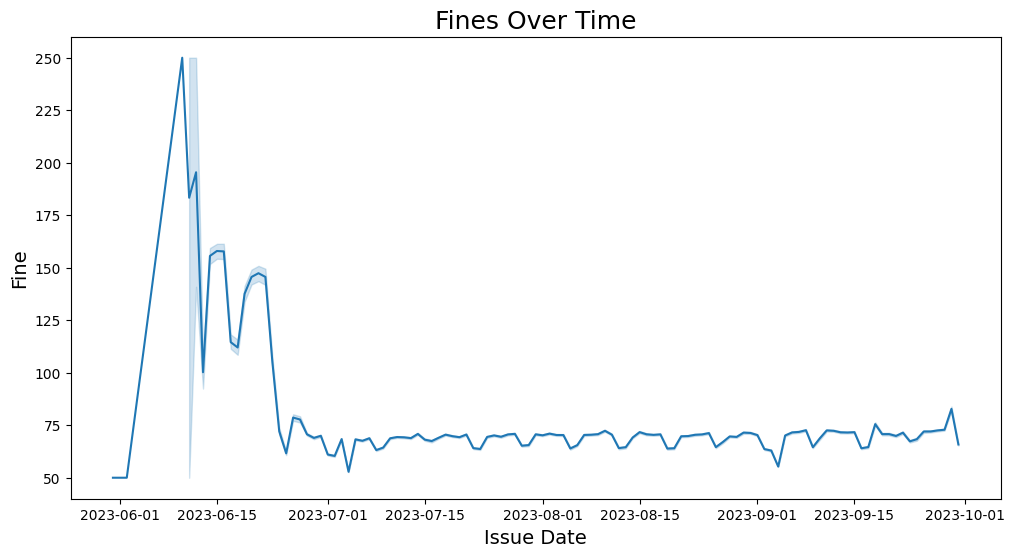

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Issue Date', y='Fine', data=park_vio)
plt.title('Fines Over Time', fontsize=18)
plt.xlabel('Issue Date', fontsize=14)
plt.ylabel('Fine', fontsize=14)
plt.show()

Through this time series chart of Fines, we can notice that the most amount of fines were paid during June.

# NLP

Due to the high computational required for running NLP on the entire column of Violation Description, we will be focusing only on the violation descriptions associated with violations in Queens; as it is our highest parking violations borough.

In [ ]:
def stem_and_lemmatize_sentences(sentences):
    # Load spaCy English model
    nlp = spacy.load("en_core_web_sm")

    # Process all sentences at once with spaCy to improve performance
    docs = list(nlp.pipe(sentences, disable=['parser', 'ner']))  # Disable unused components for speed

    # Prepare lists to store the results
    original_words = []
    lemmatized_words = []
    stemmed_words = []

    # Process each sentence
    for doc in docs:
        original_words.extend([token.text for token in doc])
        lemmatized_words.extend([token.lemma_.lower() for token in doc])
        stemmed_words.extend([token.lemma_.lower() for token in doc])  # Placeholder for stemming logic

    # Create a DataFrame with the results
    result_df = pd.DataFrame({
        'Original': original_words,
        'Lemmatized': lemmatized_words,
        'Stemmed': stemmed_words
    })

    return result_df

# Define the batch processing function with a filter for 'Queens'
def process_in_batches(park_vio, batch_size=500000):
    # Initialize an empty DataFrame to hold results
    final_result_df = pd.DataFrame(columns=['Original', 'Lemmatized', 'Stemmed'])

    # Filter the dataset for rows where 'Violation Borough' is 'Queens'
    park_vio_queens = park_vio[park_vio['Violation Borough'] == 'Queens']

    # Iterate through the filtered DataFrame in smaller batches
    for start in range(0, len(park_vio_queens), batch_size):
        end = start + batch_size
        print(f"Processing rows {start} to {end}...")

        # Select the current batch
        batch = park_vio_queens['Violation Description'].astype(str).iloc[start:end]

        # Apply the NLP function to the current batch
        batch_result_df = stem_and_lemmatize_sentences(batch)

        # Append the results to the final DataFrame
        final_result_df = pd.concat([final_result_df, batch_result_df])

    return final_result_df

# Run the process in batches with the filter for 'Queens'
result_df = process_in_batches(park_vio, batch_size=500000)

# Concatenate all words in the 'Lemmatized' column into a single string
all_words = ' '.join(result_df['Lemmatized'])

Processing rows 0 to 500000...
Processing rows 500000 to 1000000...


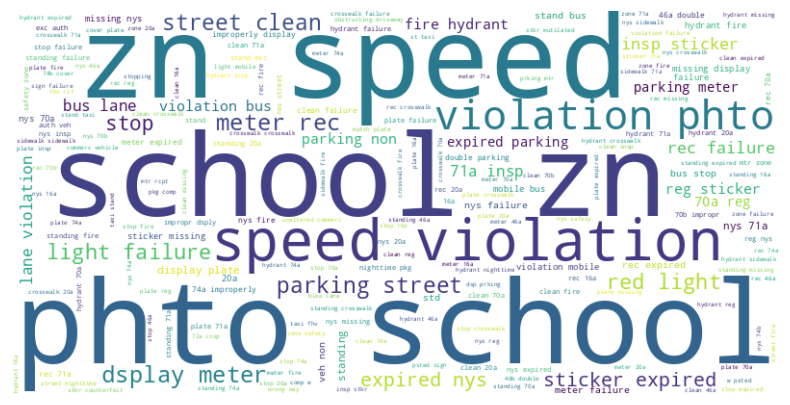

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In the word cloud, the most evident words are PHTO SCHOOL ZN SPEED VIOLATION, which refer to a camera violation regarding speeding in a school zone.

This appears to be the most common reason for parking violations in Queens.

# Picking a Target for Supervised Feature Selection

For the purpose of performing supervised feature selection, we will go through the columns and pick the best suited target.

In [ ]:
park_vio_combined.shape

(2744891, 24)

In [ ]:
park_vio_combined.columns

Index(['Feet From Curb', 'Fine', 'Month', 'Registration State_FL',
       'Registration State_GA', 'Registration State_IN',
       'Registration State_MA', 'Registration State_NC',
       'Registration State_NJ', 'Registration State_NY',
       'Registration State_PA', 'Registration State_VA',
       'Issuing Agency_TRAFFIC', 'Issuing Agency_DEPARTMENT OF TRANSPORTATION',
       'Law Section_408', 'Law Section_410', 'Law Section_411',
       'Law Section_1111', 'Law Section_1180', 'Luxury Cars_1',
       'Violation Borough_Brooklyn', 'Violation Borough_Manhattan',
       'Violation Borough_Queens', 'Violation Borough_Staten Island'],
      dtype='object')

In [ ]:
park_vio_combined['Fine'].value_counts()

,count
Fine,
50.0,1330783
65.0,519874
115.0,342721
35.0,270342
250.0,122871
60.0,100536
95.0,55432
45.0,1952
165.0,170


We can convert Fine into a category as use it as our target for feature selection.

Additionally, we will be dropping 515 from Fine, since it is an outlier compared to the remaining as the range appears to be from 35 - 250.

This is done so that when we build our PCA charts, the range can be smaller and more representative.

In [ ]:
# Remove rows where the 'Fine' column has a value of 515
park_vio_combined = park_vio_combined[park_vio_combined['Fine'] != 515]

# Verify that the rows have been deleted
print(park_vio_combined['Fine'].value_counts())

Fine
50.0     1330783
65.0      519874
115.0     342721
35.0      270342
250.0     122871
60.0      100536
95.0       55432
45.0        1952
165.0        170
180.0         78
105.0         39
Name: count, dtype: int64


In [ ]:
park_vio_combined['Fine'] = park_vio_combined['Fine'].astype('category')

In [ ]:
park_vio_combined.dtypes

,0
Feet From Curb,int64
Fine,category
Month,int32
Registration State_FL,bool
Registration State_GA,bool
Registration State_IN,bool
Registration State_MA,bool
Registration State_NC,bool
Registration State_NJ,bool
Registration State_NY,bool


# KBest

In [ ]:
# Drop rows where 'Fine' has NaN values
park_vio_combined = park_vio_combined.dropna(subset=['Fine'])

# Define the target variable
y = park_vio_combined['Fine']

# Drop the target variable from the features
X = park_vio_combined.drop(['Fine'], axis=1)

# Apply SelectKBest
k = 5
selector = SelectKBest(score_func=chi2, k=k)

# Fit and transform the data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]

# Display the selected features
print("Selected Features:", selected_feature_names)

Selected Features: Index(['Issuing Agency_TRAFFIC', 'Issuing Agency_DEPARTMENT OF TRANSPORTATION',
       'Law Section_408', 'Law Section_1111', 'Law Section_1180'],
      dtype='object')


From the KBest, wherein k=5, the selected features are 'Issuing Agency_TRAFFIC', 'Issuing Agency_DEPARTMENT OF TRANSPORTATION',
       'Law Section_408', 'Law Section_1111', and 'Law Section_1180'.

These features have the highest predictive power compared to the remaining.

# LASSO

## 5% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.05)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X, y)

# Get the non-zero coefficients
non_zero_coefficients = lasso.coef_

# Retrieve the selected features using the columns of X
selected_features = [X.columns[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['Feet From Curb', 'Month', 'Registration State_GA', 'Registration State_NY', 'Registration State_PA', 'Issuing Agency_TRAFFIC', 'Law Section_1111', 'Law Section_1180', 'Luxury Cars_1', 'Violation Borough_Brooklyn', 'Violation Borough_Manhattan', 'Violation Borough_Queens', 'Violation Borough_Staten Island']


In order to have a 5% level of error, the features needed are 'Feet From Curb', 'Month', 'Registration State_GA', 'Registration State_NY', 'Registration State_PA', 'Issuing Agency_TRAFFIC', 'Law Section_1111', 'Law Section_1180', 'Violation Borough_Brooklyn', 'Violation Borough_Manhattan', 'Violation Borough_Queens', 'Violation Borough_Staten Island'.

Since these are quite a lot of features, we will also look at 10% and 50% alpha to see if we will have lower features.
However, even if we get lower features, the model will have a worser accuracy since the alpha is higher.

## 10% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.1)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X, y)

# Get the non-zero coefficients
non_zero_coefficients = lasso.coef_

# Retrieve the selected features using the columns of X
selected_features = [X.columns[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['Feet From Curb', 'Month', 'Registration State_NY', 'Registration State_PA', 'Law Section_1111', 'Law Section_1180', 'Luxury Cars_1', 'Violation Borough_Manhattan', 'Violation Borough_Queens', 'Violation Borough_Staten Island']


In order to have a 10% level of error, the features needed are 'Feet From Curb', 'Month', 'Registration State_NY', 'Registration State_PA', 'Law Section_1111', 'Law Section_1180', 'Violation Borough_Manhattan', 'Violation Borough_Queens', and 'Violation Borough_Staten Island'.

The ones which were included in 5% but were excluded from 10% are 'Registration State_GA', 'Issuing Agency_TRAFFIC', and 'Violation Borough_Brooklyn'. This helps us understand that these feature cause the model to perform better.

## 50% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.5)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X, y)

# Get the non-zero coefficients
non_zero_coefficients = lasso.coef_

# Retrieve the selected features using the columns of X
selected_features = [X.columns[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['Feet From Curb', 'Law Section_1111', 'Law Section_1180', 'Violation Borough_Manhattan']


For 50% alpha, we have only 4 features which are 'Feet From Curb', 'Law Section_1111', 'Law Section_1180', 'Violation Borough_Manhattan'.

We can assume that these features combined have low predictive power, since higher alpha represents lower accuracy.

# Decision Tree

In [ ]:
# Initialize and fit the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Get feature importances
importances = tree.feature_importances_

# Create a list of tuples (feature_name, importance)
feature_importance = [(feature, importance) for feature, importance in zip(park_vio_combined.columns, importances)]

# Sort the features by importance in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print ranked features
print("Ranked Features by Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Ranked Features by Importance:
Issuing Agency_TRAFFIC: 0.7887
Law Section_1111: 0.0876
Violation Borough_Brooklyn: 0.0461
Registration State_VA: 0.0322
Feet From Curb: 0.0274
Registration State_NJ: 0.0052
Violation Borough_Manhattan: 0.0038
Violation Borough_Queens: 0.0024
Fine: 0.0022
Luxury Cars_1: 0.0015
Law Section_1180: 0.0015
Registration State_NC: 0.0005
Registration State_NY: 0.0003
Issuing Agency_DEPARTMENT OF TRANSPORTATION: 0.0002
Registration State_FL: 0.0001
Registration State_IN: 0.0001
Registration State_PA: 0.0001
Month: 0.0001
Registration State_MA: 0.0000
Registration State_GA: 0.0000
Law Section_408: 0.0000
Law Section_410: 0.0000
Law Section_411: 0.0000


The top 3 features using decision trees are 'Issuing Agency_TRAFFIC', 'Law Section_411', and 'Violation Borough_Brooklyn'.

# PCA

In [ ]:
# Perform PCA
pca = PCA(n_components=22)  # Select the number of components you want to keep
pca_result = pca.fit_transform(X)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                        'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'])
pca_df['target'] = y

# Print the DataFrame
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.379327 -2.603900 -0.684681  0.179861  0.467427  0.524924  0.037871   
1  1.176912 -1.602571  0.579210 -0.246604  0.082659  0.489616  0.113074   
2  1.176912 -1.602571  0.579210 -0.246604  0.082659  0.489616  0.113074   
3  1.176912 -1.602571  0.579210 -0.246604  0.082659  0.489616  0.113074   
4  0.890559 -1.699257 -0.177149  0.014231 -0.518101  1.080440 -0.525371   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0  0.908946  0.123064 -0.017620  ... -0.012197 -0.001986  0.002950 -0.002155   
1  1.054216  0.095495 -0.006197  ... -0.006323 -0.001994  0.002430 -0.002184   
2  1.054216  0.095495 -0.006197  ... -0.006323 -0.001994  0.002430 -0.002184   
3  1.054216  0.095495 -0.006197  ... -0.006323 -0.001994  0.002430 -0.002184   
4  0.690241  0.165655 -0.121616  ... -0.004087  0.001656  0.006456 -0.001977   

       PC18      PC19      PC20      PC21          PC22  target  
0 

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[2.89068175e-01 2.33581481e-01 9.01363155e-02 8.61084184e-02
 6.97251547e-02 5.88801473e-02 5.70130267e-02 4.48014536e-02
 1.81878507e-02 1.75222567e-02 9.43523854e-03 7.85370496e-03
 4.66444399e-03 4.51752970e-03 2.72795679e-03 2.69932048e-03
 2.22606742e-03 6.29232507e-04 1.75763551e-04 3.85670675e-05
 7.89463571e-06 6.33900586e-18]


In [ ]:
park_vio_combined = park_vio_combined.drop(['Fine'], axis=1)
component_weights = pd.DataFrame(data=pca.components_,
                                 columns=park_vio_combined.columns,
                                 index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                        'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22'])

print(component_weights)

      Feet From Curb         Month  Registration State_FL  \
PC1    -8.500968e-02 -2.889362e-01           3.858851e-03   
PC2    -2.618802e-02  9.566573e-01           1.449963e-03   
PC3     3.420895e-01 -1.360803e-02          -1.605645e-02   
PC4     9.320910e-01  4.354018e-03           1.383292e-02   
PC5     6.549291e-02  2.286277e-03          -5.255621e-02   
PC6     3.035205e-02  1.598423e-02          -4.775481e-02   
PC7    -2.642208e-02 -6.730901e-04           4.975098e-02   
PC8     1.610979e-02  2.899375e-02           1.275549e-02   
PC9    -1.586284e-03  2.770987e-03          -1.094330e-01   
PC10    6.786967e-03 -1.805569e-03          -2.020974e-01   
PC11   -1.087207e-03 -1.994991e-04           7.084663e-01   
PC12   -5.067926e-03  1.900544e-03           6.989099e-02   
PC13    3.588986e-03 -5.145438e-04           5.426449e-01   
PC14   -3.415395e-03  1.275009e-03           1.739533e-01   
PC15    4.995223e-04 -3.213056e-06           2.020037e-03   
PC16   -2.864186e-04  4.

## Scree Plot

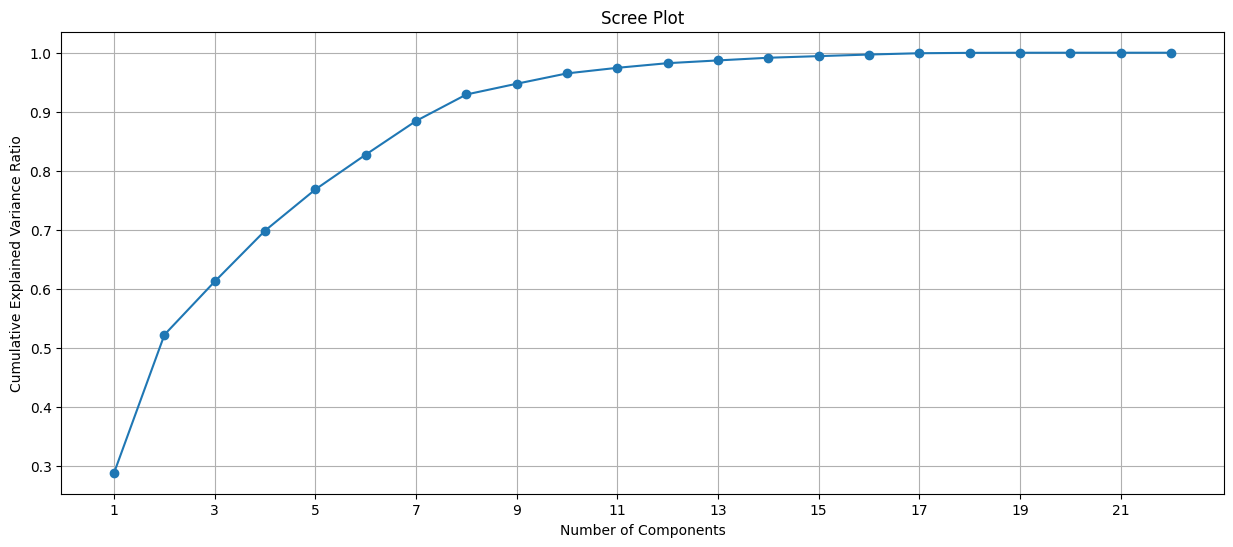

In [ ]:
# Calculate cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create scree plot
plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(ticks=np.arange(1, len(cumulative_variance_ratio) + 1, 2))
plt.grid(True)
plt.show()

Through the Scree Plot, we can identify that 7 PCs are the best number of components to have.

The following are the most important feature from the 7 PCs:

- PC1: Issuing Agency_DEPARTMENT OF TRANSPORTATION
- PC2: Law Section_408
- PC3: Law Section_1111
- PC4: Issuing Agency_DEPARTMENT OF TRANSPORTATION
- PC5: Law Section_408
- PC6: Law Section_1111
- PC7: Law Section_1111


PC1 and PC4, PC2 and PC5, and PC3, PC6, and PC7 have the same features.

Hence we can choose to only use PC1, PC2, and PC3 to build a model.



## PC1 vs PC1 colored by Fines

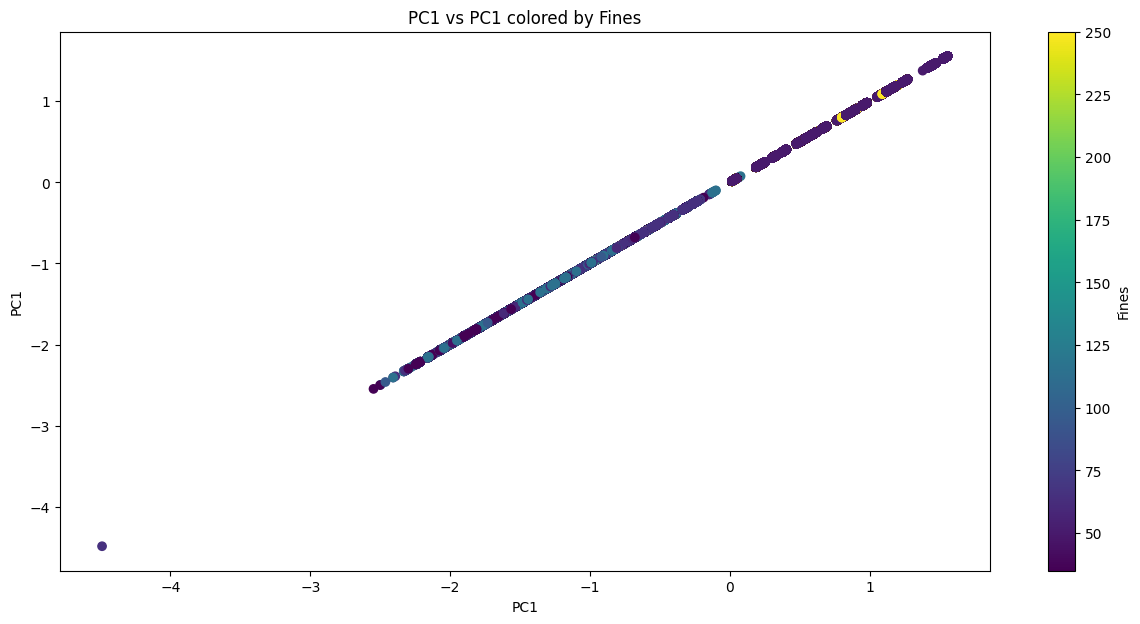

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(pca_df['PC1'], pca_df['PC1'], c=pca_df['target'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC1')
plt.title('PC1 vs PC1 colored by Fines')
plt.colorbar(label='Fines')
plt.grid(False)
plt.show()

## PC2 vs PC2 colored by Fines

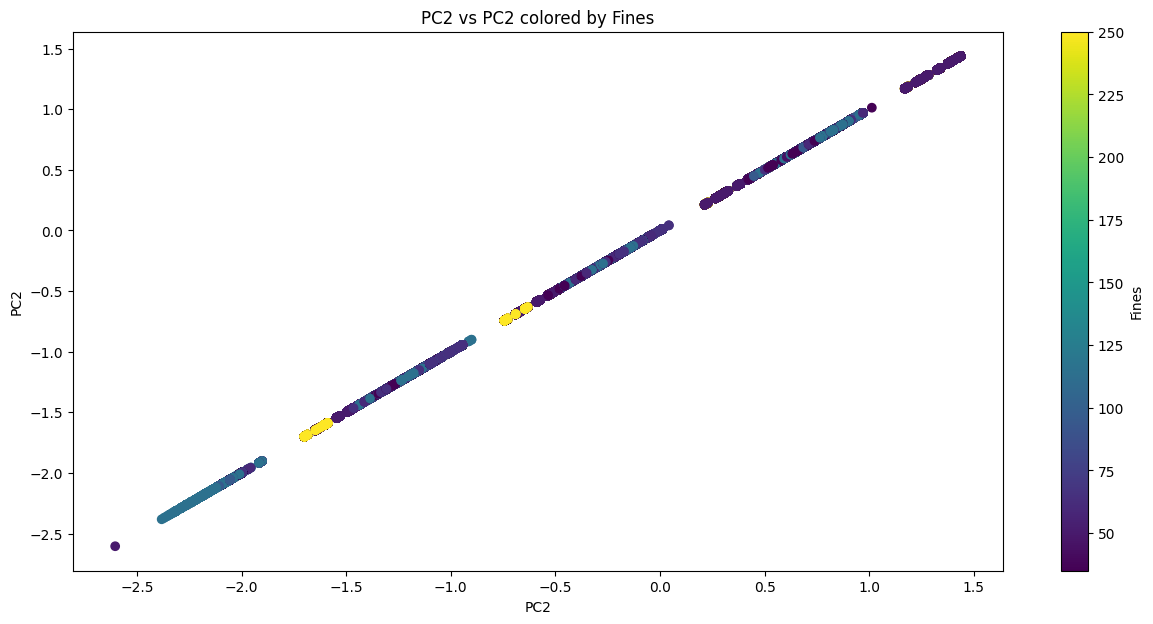

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(pca_df['PC2'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.xlabel('PC2')
plt.ylabel('PC2')
plt.title('PC2 vs PC2 colored by Fines')
plt.colorbar(label='Fines')
plt.grid(False)
plt.show()

## PC3 vs PC3 colored by Fines

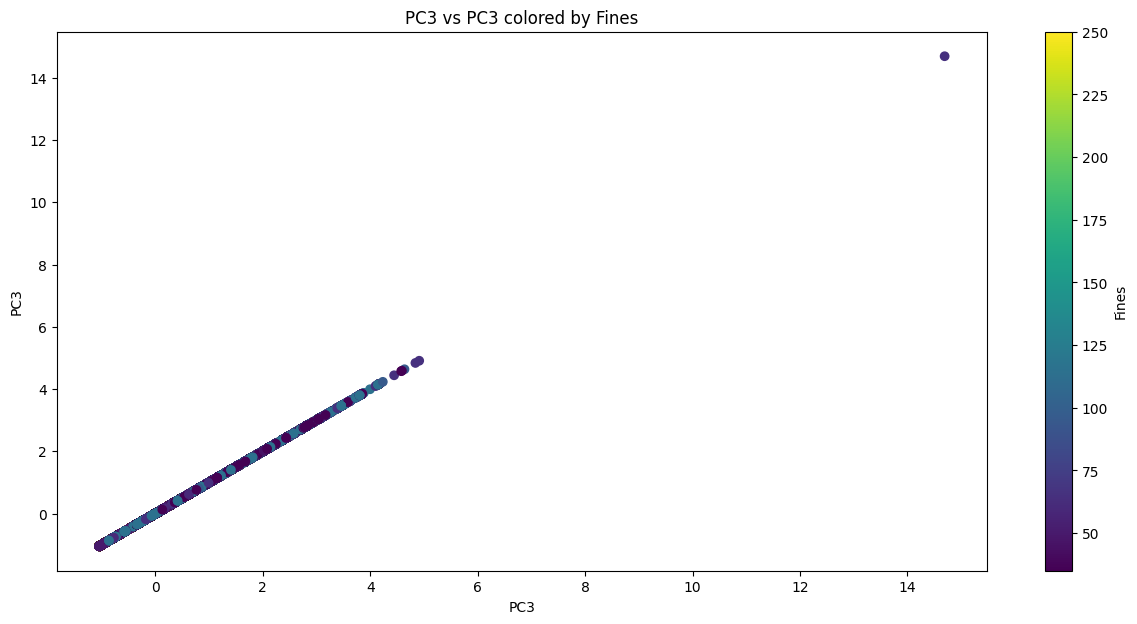

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(pca_df['PC3'], pca_df['PC3'], c=pca_df['target'], cmap='viridis')
plt.xlabel('PC3')
plt.ylabel('PC3')
plt.title('PC3 vs PC3 colored by Fines')
plt.colorbar(label='Fines')
plt.grid(False)
plt.show()

Through all the PC graphs, it is evident that there is no clear clustering suggesting that none of these PCs are very accurate for predicting fines.

# Key Takeaways

Although we gained some valuable insights from the EDA and Feature Selection conducted, it is important to remember that the feature selection may not lead to highly accurate models as the features are mostly categorical dummies.

Since we have not performed any modelling using these features, we cannot determine which features are the best. However, we can assume that it is 'Issuing Agency_TRAFFIC' since it was mentioned in KBest as well as the Decision Tree.